### EDA And Feature Engineering Of Wine Quality Dataset

### 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')
plt.style.use('ggplot')


### 2. Load the Dataset

In [5]:
#Load dataset
df = pd.read_csv('winequality-red.csv')

# Quick look
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# A function for stylish view
def print_section(title):
    print("\n" + "=" * len(title))
    print(title)
    print("=" * len(title) + "\n")

### 3. Understand the Dataset Structure

In [8]:
print_section('Shape of dataset')
print(df.shape)
print_section('Data types of features')
print(df.dtypes)

print_section('Basic info:')
df.info()
print_section('Number of unique values in features:')
print(df.nunique())



Shape of dataset

(1599, 12)

Data types of features

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur 

In [9]:
# Duplicate records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
## Remove the duplicates
df.drop_duplicates(inplace=True)


Class distribution on counts:

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

Class distribution on percentage:

quality
5    42.457689
6    39.367182
7    12.288447
4     3.899926
8     1.250920
3     0.735835
Name: proportion, dtype: float64


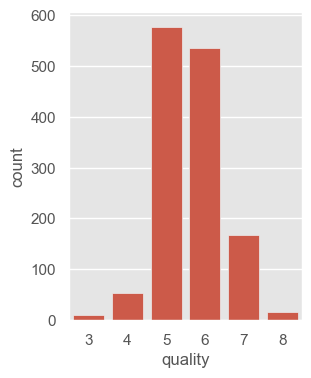

In [11]:
# Check class distribution (counts and proportions) to assess balance
print_section('Class distribution on counts:')
print(df['quality'].value_counts())
print_section('Class distribution on percentage:')
print(df['quality'].value_counts(normalize=True)*100)

# Graphical representation
fig = plt.figure(figsize=(3,4))
sns.countplot(data=df, x='quality')
plt.show()

### 4. Summary Statistics

In [13]:
# Numerical columns
print_section('Statistics of Numerical columns')
print(df.describe())


Statistics of Numerical columns

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.01

### 5. Univariate Analysis

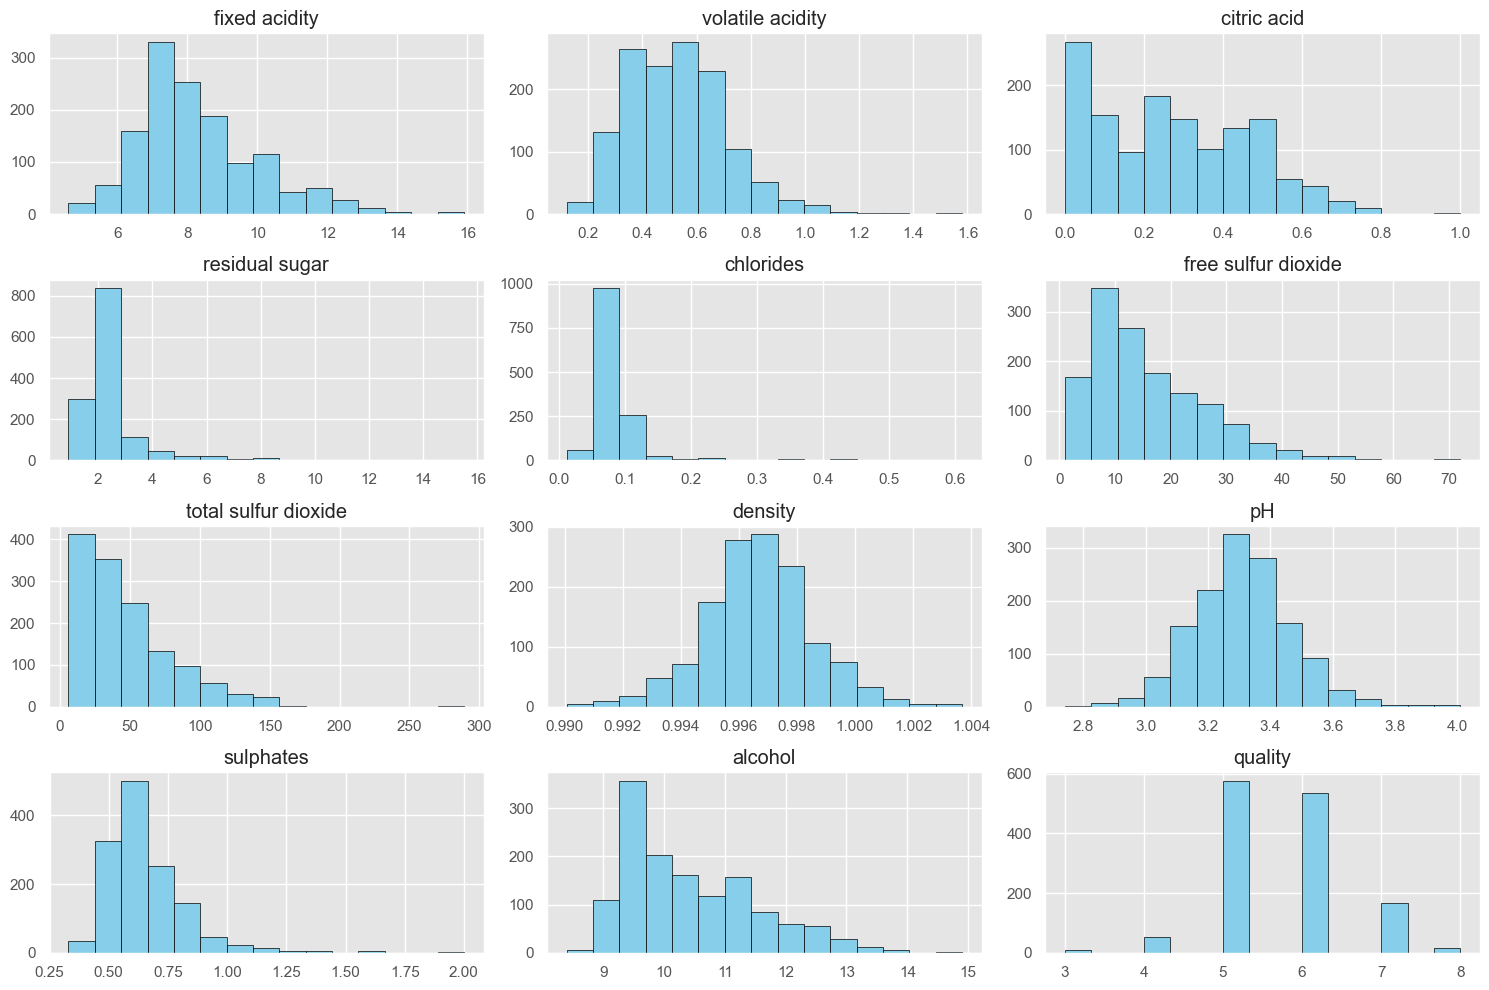

In [15]:
df.hist(bins=15, figsize=(15,10), layout=(4,3), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

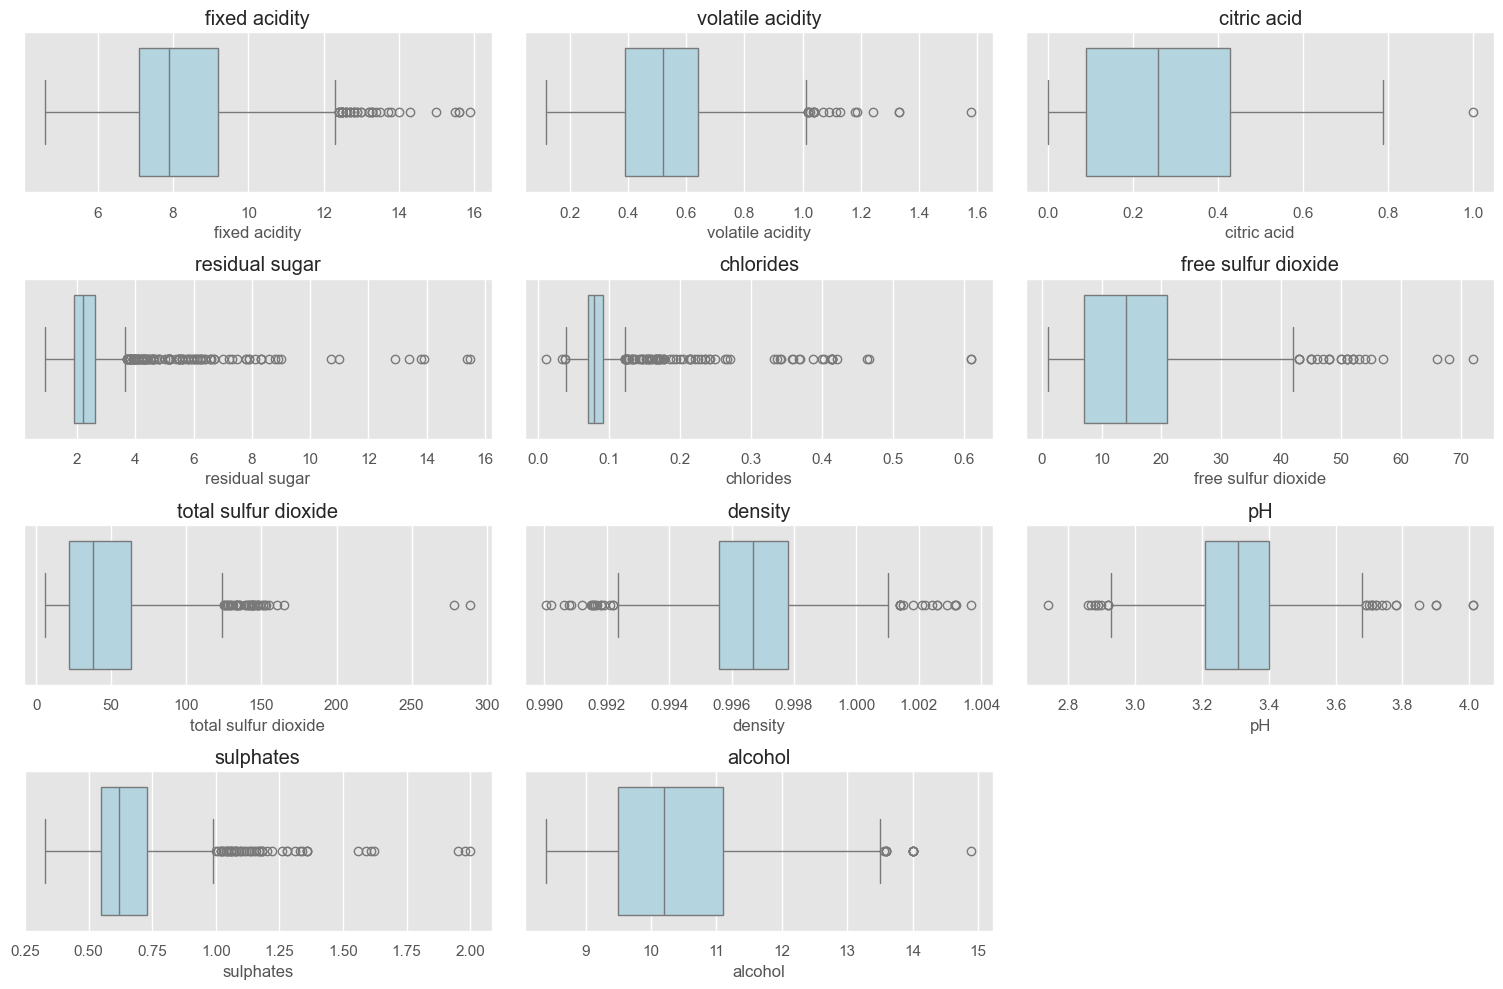

In [16]:
# Outlier Detection
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### 6. Multivariate Analysis

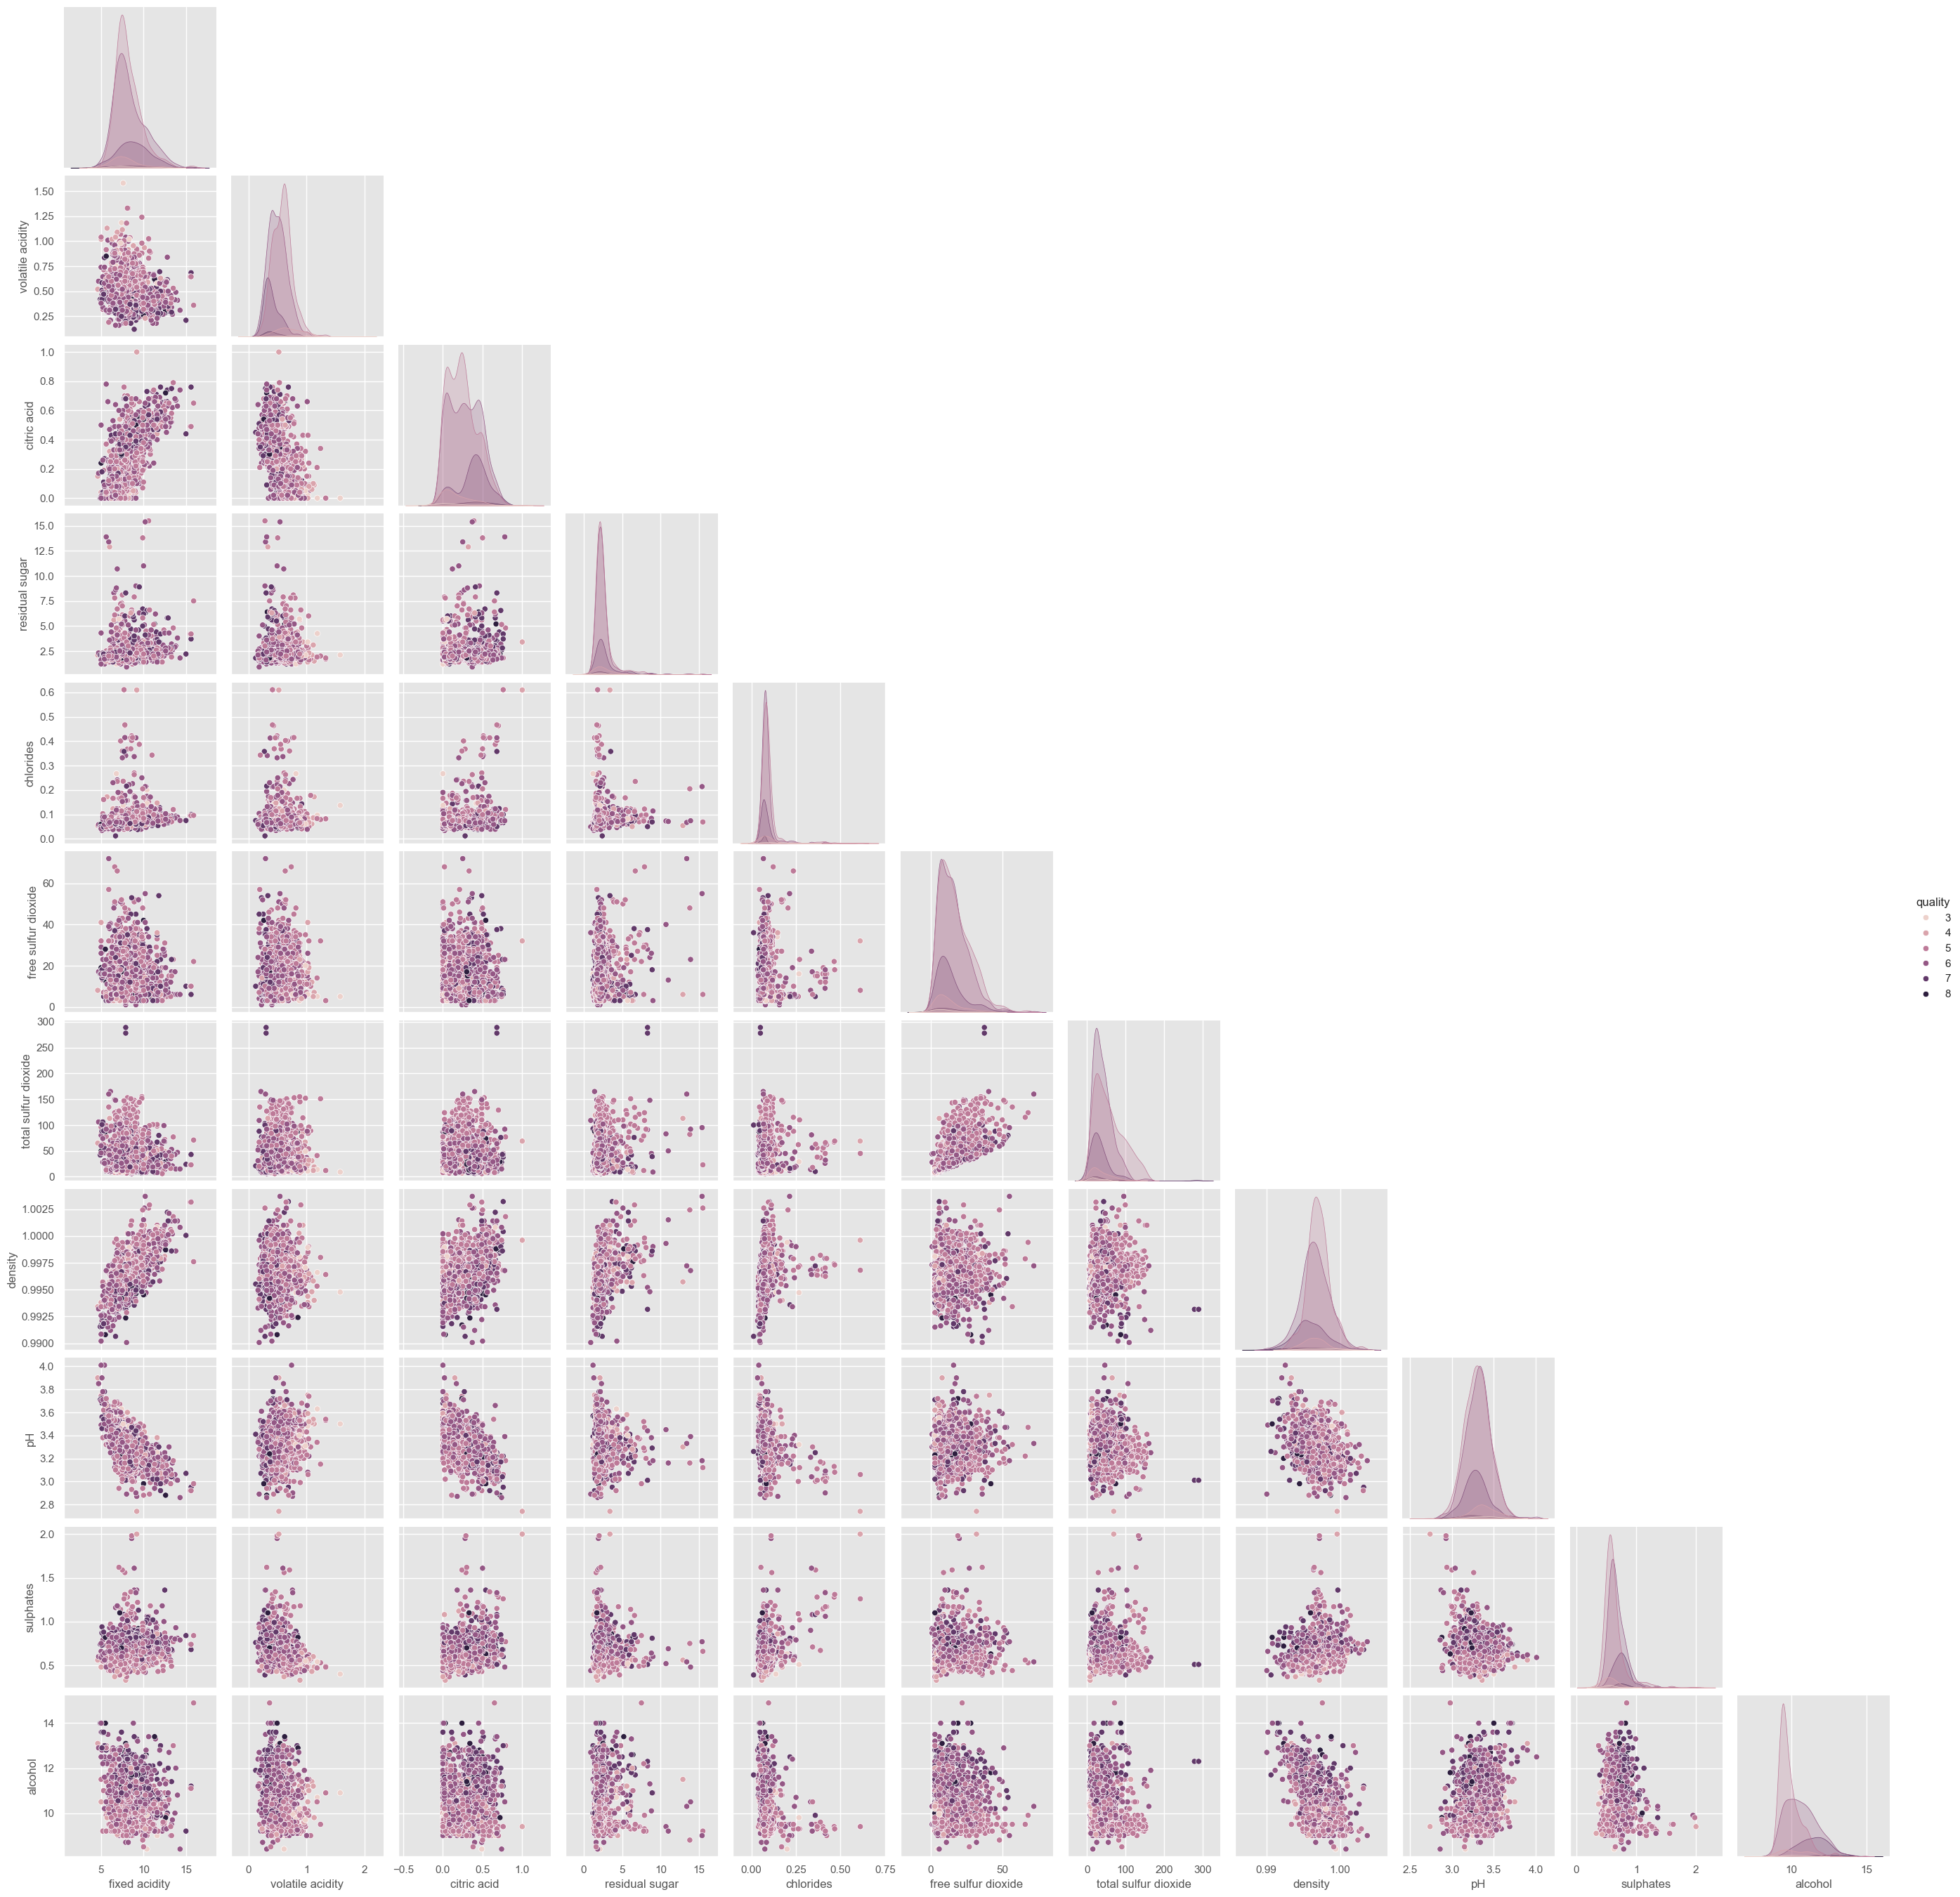

In [18]:
sns.pairplot(data=df, hue='quality', corner= True)
plt.show()

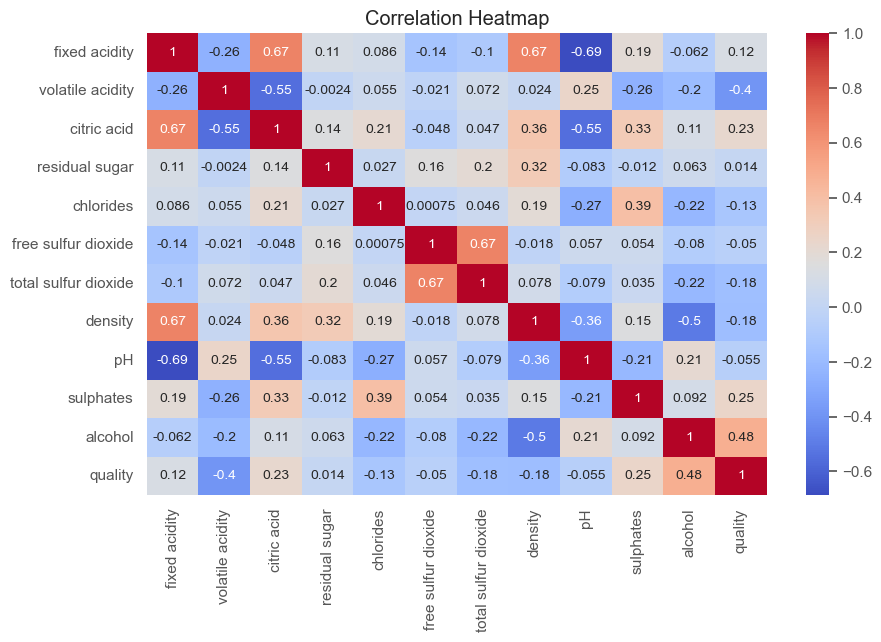

In [19]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 7. Handling Missing Data

In [21]:
# Check again for nulls
print(df.isnull().sum())
# No missing value found.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 8. Final Cleaned Dataset Overview

In [23]:
print_section("Final Cleaned Dataset Overview")
print(df.head())
print_section("Basic info about the Dataset")
print(df.info())
print_section("Description of the Numerical Data")
print(df.describe())


Final Cleaned Dataset Overview

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.

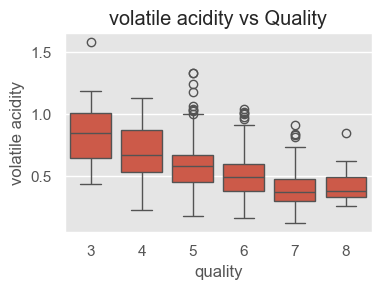

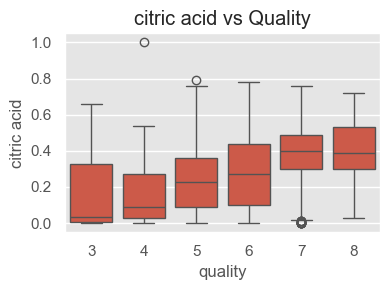

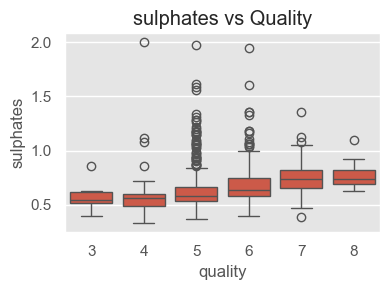

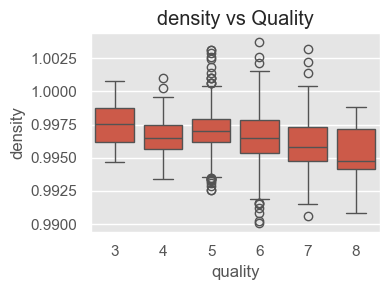

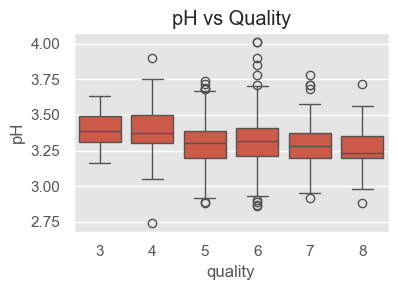

In [24]:
features = ['volatile acidity', 'citric acid', 'sulphates', 'density', 'pH']
for feature in features:
    fig = plt.figure(figsize=(4,3))
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f"{feature} vs Quality")
    plt.tight_layout()
    plt.show()
